In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from scipy import stats

# **Loading the Data**

<font color=teal> ***Dataset Link:*** https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

In [6]:
data = pd.read_csv("/content/drive/MyDrive/A_Projects/Bankruptcy_Prediction_model/data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# **Exploratory Dsta Ananlysis**

## **Data Overview**

In [7]:
data.isna().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [8]:
data.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [9]:
data.shape

(6819, 96)

In [5]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## **Visualizations**

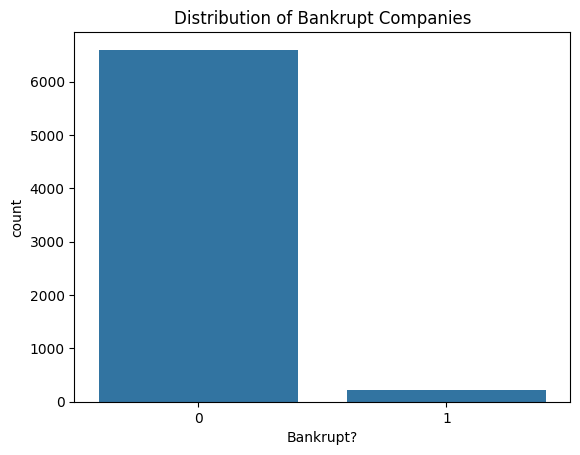

In [10]:
# Target Variable Distribution

sns.countplot(x='Bankrupt?', data=data)
plt.title('Distribution of Bankrupt Companies')
plt.show()

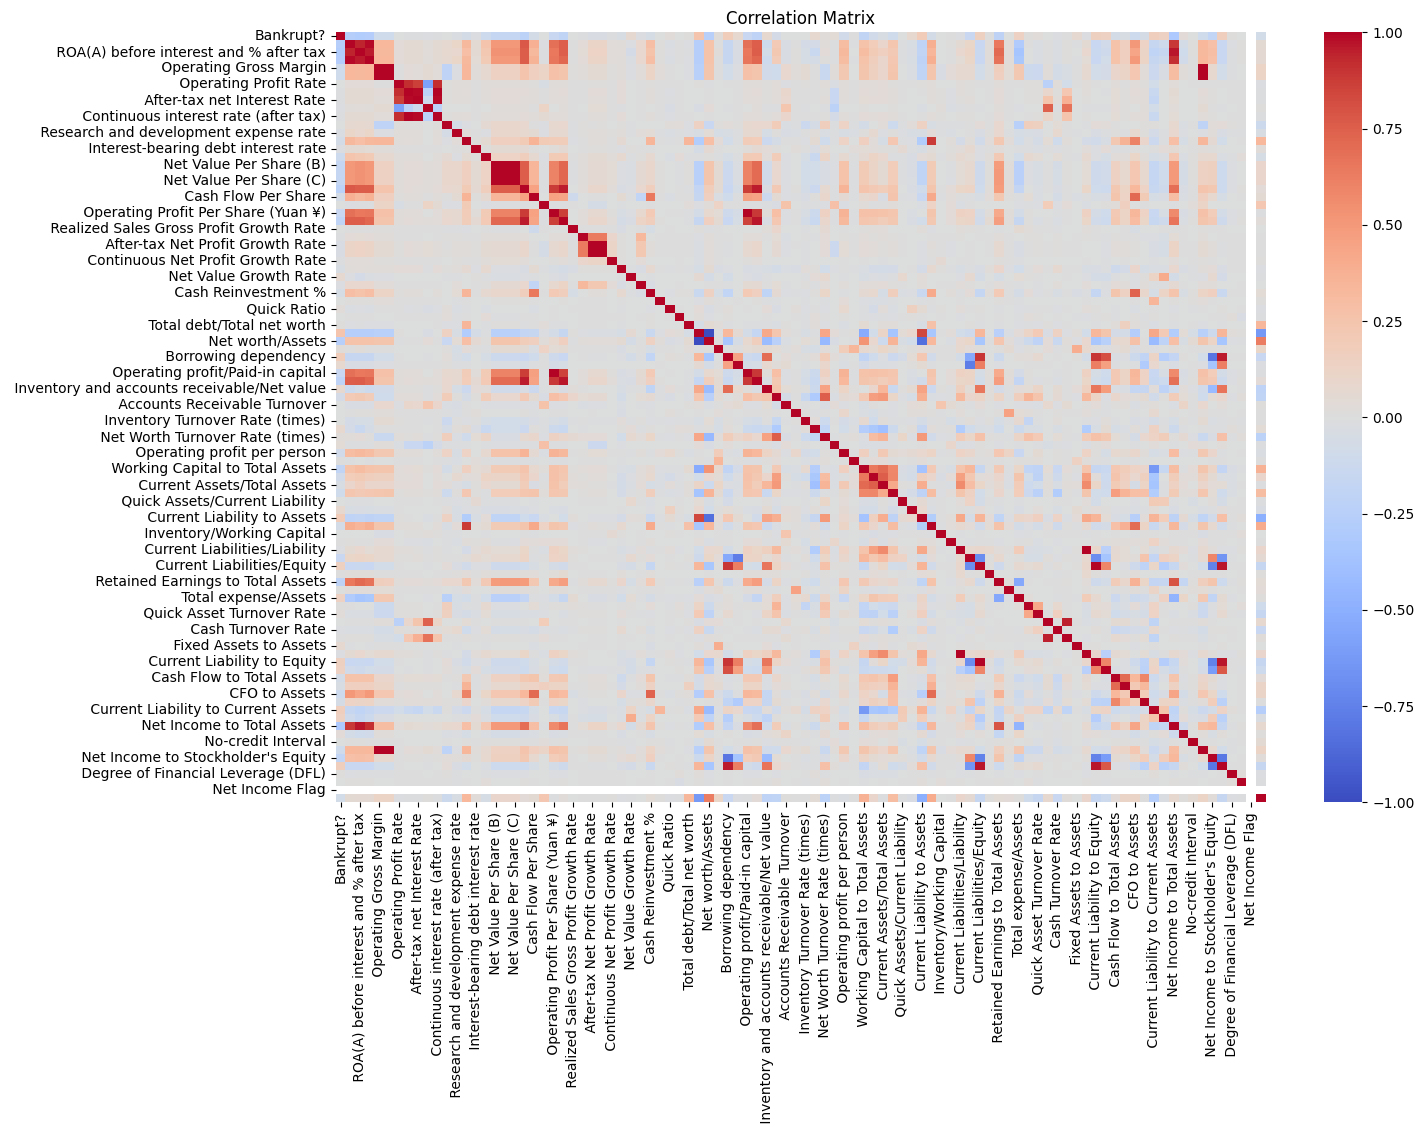

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Box plot for feature Analysis

features = data.columns[1:]  # Excluding the target variable
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Bankrupt?', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Bankruptcy')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Count of features by Bankruptcy Status

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=feature, hue='Bankrupt?', multiple="stack", bins=30)
    plt.title(f'Distribution of {feature} by Bankruptcy Status')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

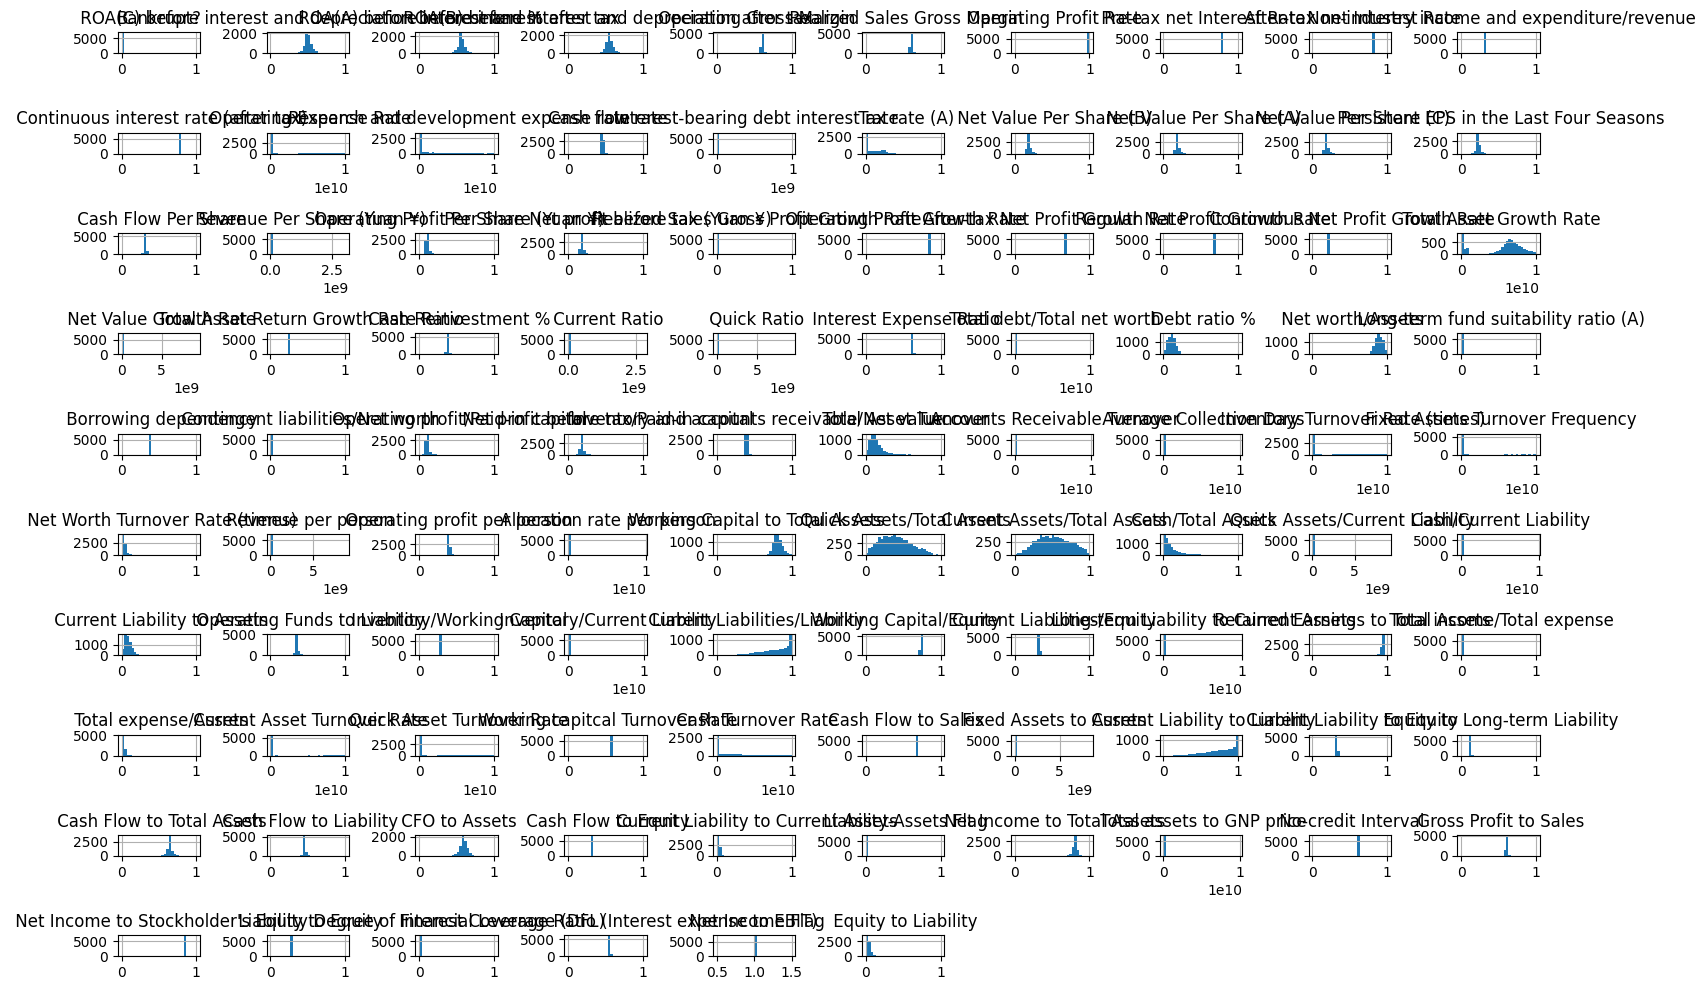

In [ ]:
# Feature Distribution

data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Statistical Summary by Bankruptcy Status

data.groupby('Bankrupt?').mean()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,
0,0.508069,0.562015,0.556659,0.608257,0.608237,0.998756,0.79721,0.809106,0.303657,0.781401,...,0.810083,1.621670e+07,0.623927,0.608256,0.840882,0.279925,0.027511,0.565371,1.0,0.048337
1,0.418503,0.456947,0.461483,0.598670,0.598717,0.998739,0.79659,0.808424,0.302609,0.780799,...,0.738083,9.100000e+07,0.623541,0.598669,0.826008,0.293578,0.028443,0.564959,1.0,0.024832


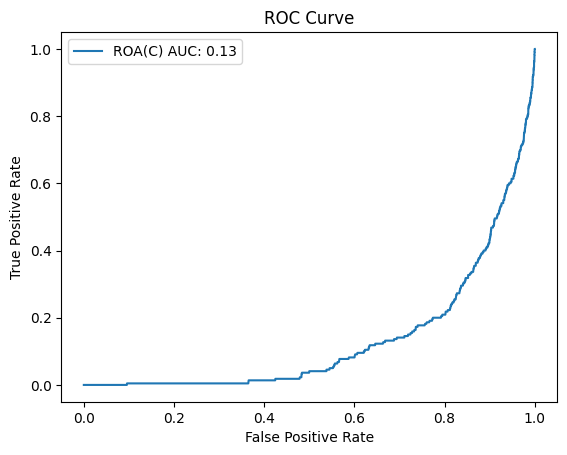

In [ ]:
# Feature Relationships with ROC

fpr, tpr, _ = roc_curve(data['Bankrupt?'], data[' ROA(C) before interest and depreciation before interest'])
plt.plot(fpr, tpr, label='ROA(C) AUC: %0.2f' % roc_auc_score(data['Bankrupt?'], data[' ROA(C) before interest and depreciation before interest']))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

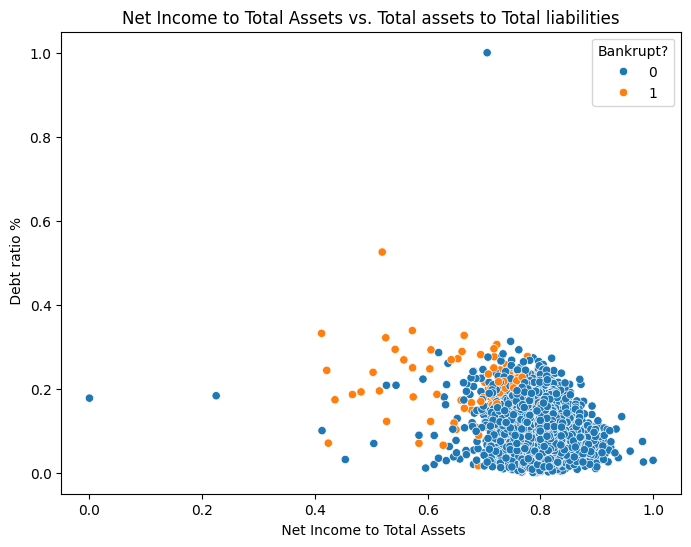

In [ ]:
# Scatter plot of two potentially relevant features

plt.figure(figsize=(8, 6))
sns.scatterplot(x=' Net Income to Total Assets', y=' Debt ratio %', hue='Bankrupt?', data=data)
plt.title('Net Income to Total Assets vs. Total assets to Total liabilities')
plt.show()

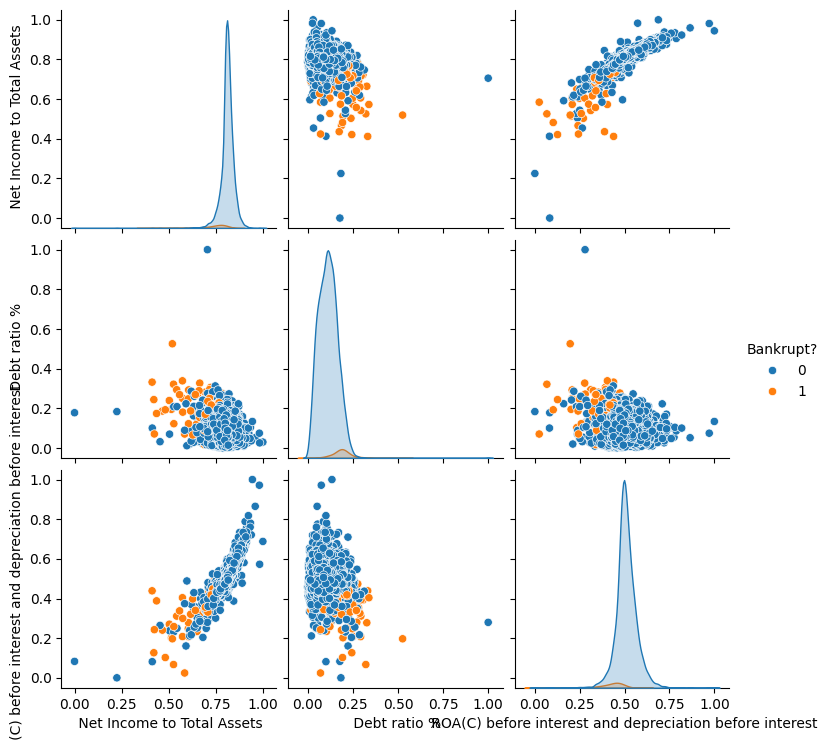

In [ ]:
# Pairplot for selected features

selected_features = [' Net Income to Total Assets', ' Debt ratio %', ' ROA(C) before interest and depreciation before interest', 'Bankrupt?']
sns.pairplot(data[selected_features], hue='Bankrupt?')
plt.show()

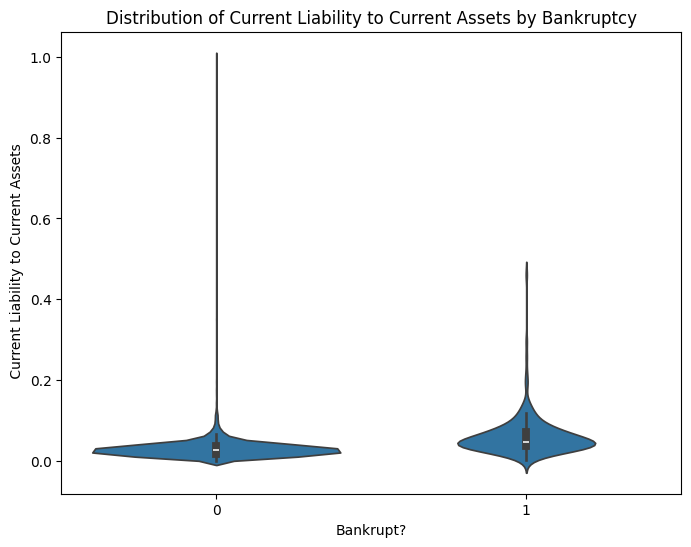

In [ ]:
# Violin plot for a feature

plt.figure(figsize=(8, 6))
sns.violinplot(x='Bankrupt?', y=' Current Liability to Current Assets', data=data)
plt.title('Distribution of Current Liability to Current Assets by Bankruptcy')
plt.show()

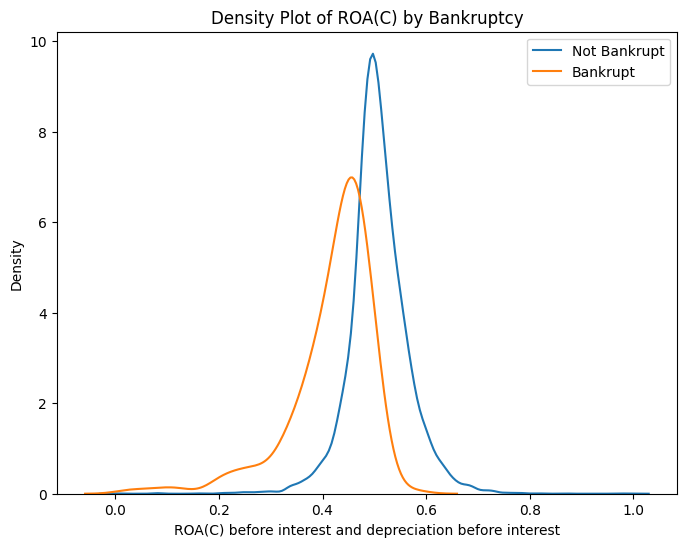

In [ ]:
# Density plot of a feature

plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Bankrupt?'] == 0][' ROA(C) before interest and depreciation before interest'], label='Not Bankrupt')
sns.kdeplot(data[data['Bankrupt?'] == 1][' ROA(C) before interest and depreciation before interest'], label='Bankrupt')
plt.xlabel('ROA(C) before interest and depreciation before interest')
plt.ylabel('Density')
plt.title('Density Plot of ROA(C) by Bankruptcy')
plt.legend()
plt.show()

# **Data Pre-Processing**

## **Applying Natural Log to Big value Columns**

In [11]:
cols = [' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 ' Total assets to GNP price']

In [12]:
large_value_columns = cols
for col in large_value_columns:
    data[col] = np.log1p(data[col])

## **Feature/Target Split**

In [13]:
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

## **Train/Test Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## **SMOTE Balance**

In [15]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# **Logistic Regression**

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## **Evaluation**

In [17]:
y_pred_log = model.predict(X_test)
y_prob_log = model.predict_proba(X_test)[:, 1]

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1760  220]
 [  12   54]]


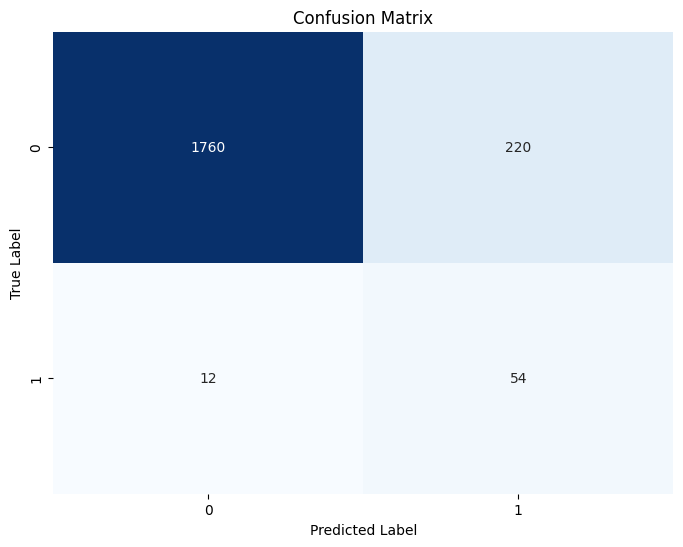

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1980
           1       0.20      0.82      0.32        66

    accuracy                           0.89      2046
   macro avg       0.60      0.85      0.63      2046
weighted avg       0.97      0.89      0.92      2046



## **ROC curve**

In [20]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob_log)
print("\nROC AUC Score:", roc_auc)


ROC AUC Score: 0.9272076828895011


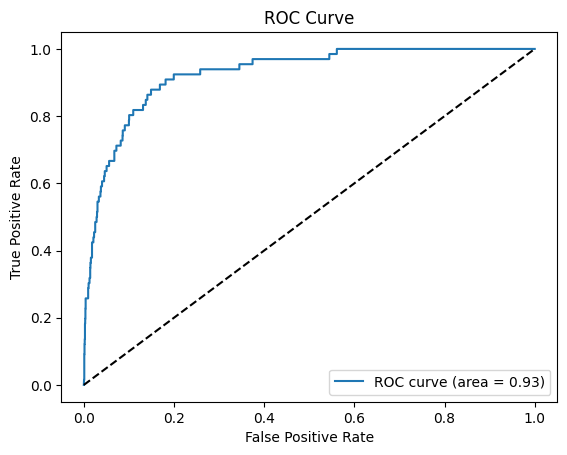

In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **HyperParameter Tuning**

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_res, y_train_res)
print("Best parameters:", grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 100, 'solver': 'liblinear'}


In [ ]:
y_pred = grid.predict(X_test)

## **Evaluation**

## **Confusion Matrix**

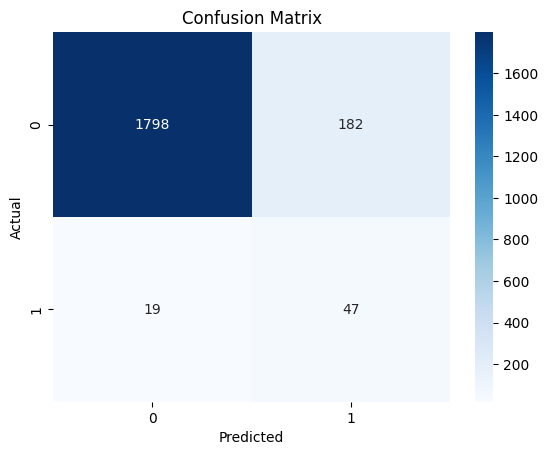

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1980
           1       0.21      0.71      0.32        66

    accuracy                           0.90      2046
   macro avg       0.60      0.81      0.63      2046
weighted avg       0.96      0.90      0.93      2046



# **ROC Curve**

In [ ]:
roc_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8871173859810223


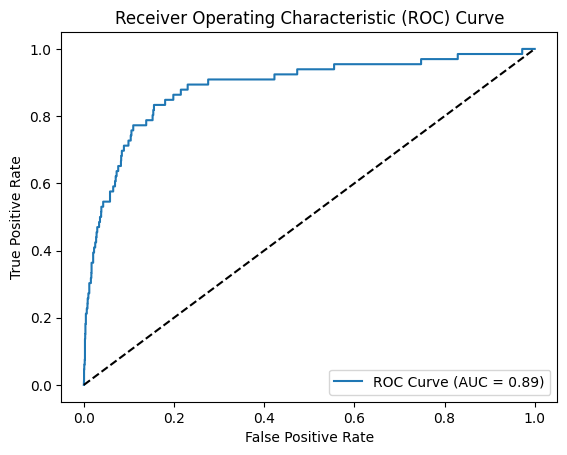

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Feature Importance**

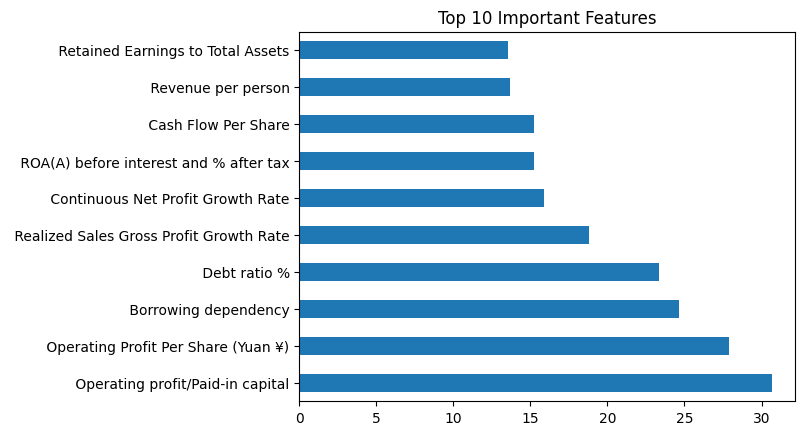

In [ ]:
feature_importance = pd.Series(grid.best_estimator_.coef_[0], index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()